In [5]:
import sys

print(sys.version)
import os
print(os.path.abspath('.'))
%matplotlib inline 
import io 
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
from fitter import Fitter
import matplotlib 
import matplotlib.pyplot as plt 

matplotlib.rcParams['figure.figsize'] = (16.0, 14.0) 

matplotlib.style.use('ggplot')

# 让notebook宽屏显示
from IPython.display import display, HTML
display(HTML('<style>.container{width:100% !important;}</style>'))



3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
D:\liing\Mynote\notebook\mycode


0.9, 20, 100
0


Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.39s/it]


{'invgauss': {'mu': 2.081629155020262, 'loc': 20.93508441508161, 'scale': 68.18259799615277}}
count    100000.000000
mean        169.945877
std         165.507244
min          21.037343
25%          74.687647
50%         120.416614
75%         204.761966
max        5423.541280
dtype: float64
*********************
[104.75267889 212.59407796  35.21441888 ... 190.1597548  225.81237924
  59.1493722 ]
99418
(64.486, 0.007)


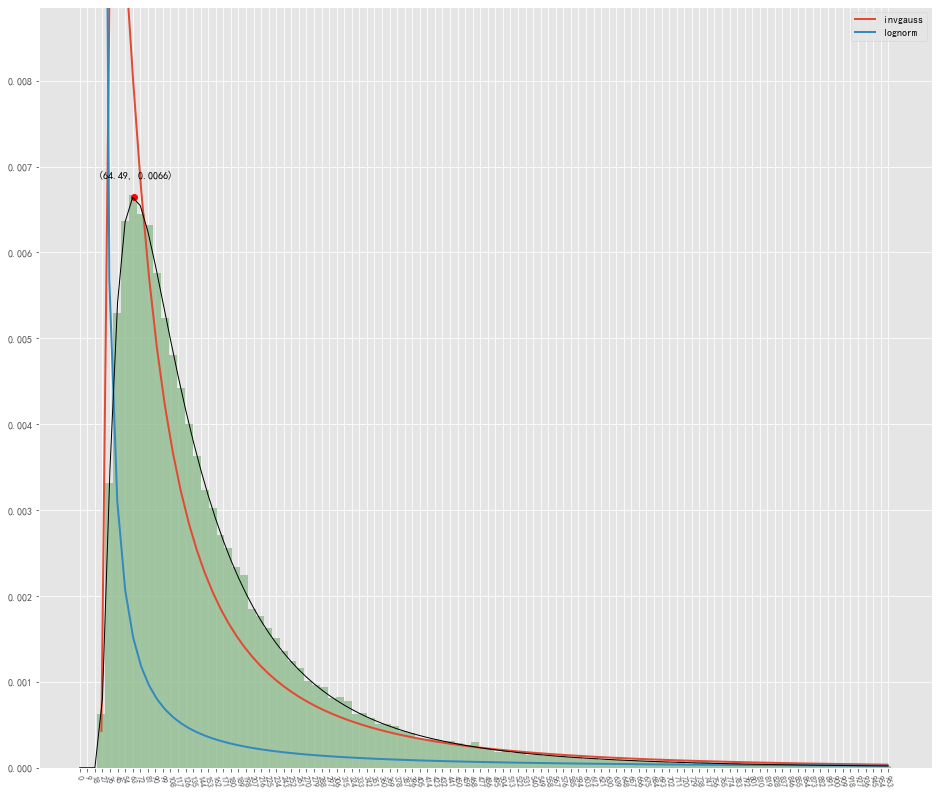

In [10]:
# 对数正态连续随机变量。

from scipy.stats import lognorm
import matplotlib.pyplot as plt
from fitter import Fitter
import pandas as pd
from scipy.stats import chi2
from scipy.optimize import minimize_scalar

# print(matplotlib.version)

# s, loc, scale = 0.9521372123314837, 31.615794107171943, 189.53264931243058
# mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

# fig, ax = plt.subplots(1, 1)
# x = np.linspace(0,2, 100)
# # # s, loc, scale = 4.254351041552599, 1.7283893605279232, 2.3241782062406915
# # s, loc, scale = 0.549, -1.012, 32   # 4.359
# # s, loc, scale =0.98, 10, 0# 4.359
# s, loc, scale = 0.952, 31.616, 189.533
# ax.plot(x, lognorm.pdf(x, s, loc=0.2),  'r-', lw=5, alpha=0.6, label='lognorm pdf')
# # # ax.plot(x, lognorm.pdf(x, 0.95, loc=0.4),  'g-', lw=5, alpha=0.6, label='lognorm pdf')
# # # ax.plot(x, lognorm.pdf(x, 0.3),  'c-', lw=5, alpha=0.6, label='lognorm pdf')
# # ax.plot(x, lognorm.pdf(x, 0.95),  'y-', lw=5, alpha=0.6, label='lognorm pdf')
# ax.legend(loc='best', frameon=False)


s, loc, scale = 0.95, 10, 0
s, loc, scale = 0.952, 31.616, 189.533


# # 点击 到 安装

# # r888
# s, loc, scale = 0.5462399635283319, 6.327149254424501, 69.61662367689756   # r888  384   峰值  60-66   密度 0.012
# s, loc, scale = 0.9, 0, 60             # r888  384   峰值 30-36  密度 0.011
# s, loc, scale = 0.7, 0, 60            # r888  384   峰值 40  密度 0.012   12月26日~1月2日 时间戳
# s, loc, scale = 0.6, 0, 80            # r888  384  2023-01-17 调   峰值 56   密度 0.01
s, loc, scale = 0.65, 3, 60            # min 7  max 800  （3.14调 ）                     (42.324, 0.013)


# com.rl888sport.rl
# s, loc, scale = 0.5462399635283319, 6.327149254424501, 69.61662367689756     # r888  384    (57.984, 0.012)
# s, loc, scale = 0.7, 0, 60          # 峰值 40  -> 14天，时间撮                         (36.758, 0.012)
# s, loc, scale = 0.6, 0, 90          # 2023-01-04 峰值 66                              (62.791, 0.009)
# s, loc, scale = 0.45, -10, 75       # r888sport  384  2023-01-13 峰值 50（0.014）     (51.251, 0.013)
# s, loc, scale = 0.6, 0, 66          # min 6  max 1084  （3.13调 ）                      (46.047, 0.012)
# s, loc, scale = 0.65, 0, 80          # min 8  max 800  （3.14调 ）                      (52.433, 0.009)
# s, loc, scale = 0.9, 5, 90           #时间戳  17天
# s, loc, scale = 0.8, 3, 65           #3.28  min 7 max 2500   (37.274, 0.011)
# s, loc, scale = 0.65, 1, 60          #3.28  min 4 max 1200   (40.324, 0.013)
# s, loc, scale = 0.85, 3, 75          #4.3  min 4 max 2500    (39.415, 0.009)
# s, loc, scale = 0.85, 8, 45          #4.4 时间戳 峰值29
s, loc, scale = 1, 8, 80              # 4.12  min 8 max 5000   (37.43, 0.008)

# # Mb bank              110Mb   VN
# s, loc, scale = 0.96, 1, 9
# s, loc, scale = 0.5824422192778205, 3.037957417378336, 99.2450011222519    # MB Bank   384拟合
# s, loc, scale = 0.5, 10, 110        # MB Bank  峰值92 - 100
# s, loc, scale = 0.45, 0, 110        # MB Bank  峰值80 - 84  384渠道曲线

# s, loc, scale = 0.45, 0, 100        # 峰值 78~81  384渠道曲线
# s, loc, scale = 0.44, 0, 96         # 峰值 81  384渠道曲线
# s, loc, scale = 0.5, 10, 110        # 峰值92 - 100  384渠道曲线
# s, loc, scale = 0.9, 10, 100        # 峰值 56-60  0.007  本地5271667:12.22-1.22    线上 1.13-1.26（2.21-2.22时间戳  已时间戳两个 是否能重复用存疑）

# s, loc, scale = 0.8, 0, 110           # 2023-01-28调  峰值 60-66  0.0064   1天时间戳
# s, loc, scale = 0.55, 0, 110          # 2023-01-28调  峰值 80-86  0.0077   1天时间戳
# s, loc, scale = 0.5370850002485996, -16.925457486092, 140.16312792361168  # 384
# s, loc, scale = 0.6, 3, 130         # 2023-01-31调  峰值 100  0.0063  时间戳 1天
# s, loc, scale = 0.8, 10, 150        # 2023-01-31调  峰值 89  0.004-0.005 min 19  时间戳 4天  可以考虑循环用

# s, loc, scale = 0.75, 12, 110  #2023-02-06调  峰值 75  0.007-0.008 mix 15  时间戳 1天
# s, loc, scale = 0.85, 12, 120  #2023-02-15调  峰值 70  0.006 min 15 2天时间戳 max 2000以上

# s, loc, scale = 0.55, 12, 82  #2023-02-15调  峰值 75  0.01-0.011 min 19  没用
# s, loc, scale = 0.9, 16, 170  #2023-02-15调  峰值 92  0.004-0.005 min 17 max 6000以上
# s, loc, scale = 0.9, 13, 145  #2023-02-17调  峰值 77 0.005 min 16 max 3000以上

# s, loc, scale = 0.9, 12, 120  #2023-02-23调  峰值 65 0.005-0.006 min 14 max 3000以上  时间戳

# s, loc, scale = 0.9, 12, 200  #2023-02-23调  峰值 100 0.003-0.004 min 17 max 5000以上  
# s, loc, scale = 0.9, 10, 108  ##  3.28  0.006-0.007  
# s, loc, scale = 0.9, 13, 130  ##  3.29  0.005--0.006  峰值70峰值58s 时间戳  时间戳
# s, loc, scale = 0.7, 13, 130  ## 0.005-0.006 3000以上 17 峰值92 3.31
# s, loc, scale = 0.9, 15, 158  ## 0.004-0.005 17 6000以上 峰值85 3.31
# s, loc, scale = 1, 23, 200  ## 0.004-0.005 17 6000以上 峰值85 3.31
s, loc, scale = 0.9,25,135 ## 0.004-0.005 峰值 85
s, loc, scale = 0.9,20,120  ##峰值0.005--0.006 峰值73
s, loc, scale = 0.9,20,100


# # Truebanlance
# s, loc, scale = 1.6, 8, 110         # com.balancehero.truebalance  ctit
# s, loc, scale = 0.96, 0.15, 1.4
# s, loc, scale = 0.6, 0, 110         # 生成10000数据 最小 8  最大 966  峰值  78  -> 时间撮
# s, loc, scale = 0.9, 8, 110         # 生成10000数据 最小 11  最大 5821  峰值  65  -> 14天，时间戳
# s, loc, scale = 0.6, 8, 60          # 2023-01-04 调整   生成10000数据 最小 12  最大 700   峰值 50 0.0134  起止：2023.1.4 -> 20.23.1.22
# s, loc, scale = 0.95, 5, 80         # 2023-01-28调  最小 5.6  最大 4971  峰值 40-45  密度 0.0083  起止：2023-01-28 ->

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
# # com.ada.astrapay           32Mb   ID
# a, loc, scale = 1.620, 1.893, 49.491           # 峰值 40~50    pkg ~32MB
# s, loc, scale = 0.6, 0, 80                     # 峰值 50  0.01     min 4  max 1500           21天  时间戳
# s, loc, scale = 0.8, 5, 110                    # 峰值 66  0.0064   min 8  max 3000 (2.1日调)  1天时间戳

# s, loc, scale = 0.8, 5, 70                     # 峰值 45  0.0098   min 7  max 2400 (2.2日调)
# s, loc, scale = 0.58, 5, 85                    # 峰值 60-70  0.009-0.01   min 9  max 800以上  (2.6日调)
# s, loc, scale = 0.9, 5, 90                     # 峰值 45-50  0.007-0.008   min 6  max 3500以上  (2.8日调)

# mx.com.bancoazteca.bazdigitalmovil           60MB  MX
# s, loc, scale = 0.90, 20, 170               # min 22 max 12685   3.06调   3.27日时间戳  18天
# s, loc, scale = 0.90, 15, 140
# s, loc, scale = 0.95, 12, 180
# s, loc, scale = 0.55, 5, 130
# s, loc, scale = 0.90, 13, 140                # min 17 max 5000     (75.28, 0.005)   3.27调

# # com.bpi.ng.mobilebanking   67Mb   PH
# s, loc, scale = 0.8, 10, 150
# s, loc, scale = 0.9, 8, 100   #2.3调整 峰值50-60 密度0.07 最小值10左右 最大值3000以上 (2.3日调)

# # com.netway.phone.advice    65Mb   IN
# s, loc, scale = 0.85, 8, 160      # 峰值 72  0.0055  min 8   max 5600 


# # com.linkdokter.halodoc.android  48Mb  ID
# s, loc, scale = 0.8, 15, 160           # 峰值 100-105  0.0048   min 19  max 5300 (2.1日调)
# s, loc, scale = 0.9, 8, 100    #2.3调整 峰值50-60 密度0.07 最小值10左右 最大值3000以上 (2.3日调)

# # vn.com.techcombank.bb.app   62Mb  VN -> 73.6MMb
# s, loc, scale = 0.85, 8, 145          # 峰值 75-80 0.005   min 11  max 5200
# s, loc, scale = 0.8, 23, 145            #  2.3调整 峰值 70-90不定 0.005   min 11  max 4000以上(2.3日调)  62Mb
# s, loc, scale = 0.96, 23, 160           # 4.13调  min 25  max 10000    (86.661, 0.004)    73.6Mb  
# s, loc, scale = 1.15, 33, 190           # 4.13调  min 33  max 20000    (83.629, 0.004)    73.6Mb  

# # com.naviapp                 65Mb  IN
# s, loc, scale = 0.8, 6, 100         # 峰值 60  0.0072   min 8   max 2600    1.5天 时间戳
# s, loc, scale = 0.85, 8, 160        # 峰值 80  0.005    min 11  max 6000
# s, loc, scale = 0.95, 10, 160        # min 13 max 5000  （3.14调 ）          (74.889, 0.0041)  13天时间戳
# s, loc, scale = 0.92, 13, 155        # min 18 max 5400  （3.14调 ）          (79.488, 0.004)  3天
# s, loc, scale = 0.95, 16, 140        # min 19 max 7000  （4.7调 ）            (72.778, 0.005) 
# s, loc, scale = 1, 15, 161         # min 17 max 8000  （4.7调 ）              (74.229, 0.004)
# s, loc, scale = 0.9, 25, 150


# # com.zeptoconsumerapp        29Mb  IN
# s, loc, scale = 0.95, 3, 120        # 峰值 60  0.006    min 5   max 7000    1.5天 时间戳
# s, loc, scale = 0.95, 5, 80         # 2023-01-28调  最小 5.6  最大 4971  峰值 40-45  密度 0.0083  起止：2023-01-28 ->
# s, loc, scale = 0.6, 5, 75         # 2023-02-10调  最小 9  最大 600以上  峰值 45  密度 0.011 

# # com.kreditbee.android      11Mb  IN
# s, loc, scale = 0.9, 6, 60          # 峰值 35  0.0113  min 7   max 3000    (2.3日调)
# s, loc, scale = 0.8, 3, 40            # min 4   max 1300   (24.092, 0.017)   (3.31调)
# s, loc, scale = 0.9, 8, 80 
# s, loc, scale = 0.6, 6, 40 

# # naukriApp.appModules.login 14Mb  IN
# s, loc, scale = 0.8, 0, 90           # 峰值 35  0.0113   min 7   max 3000 (2.3日调)

# # com.zvooq.openplay         23Mb   RU
# s, loc, scale = 0.9, 8, 70        # 峰值 35-40 0.0095     min 10   max 3500 (2.3日调)

# # com.asf.singa              21Mb    ID   P360_lite
# s, loc, scale = 0.95, 5, 120         # 峰值 55  0.006     min 7   max 5800 (2.1日调)
# s, loc, scale = 0.85, 5, 55          # 峰值 30-40 0.013   min 7   max 2000 (2.3日调)

# # com.my11circle.android     10Mb    IN
# s, loc, scale = 0.75, 8, 120         # 峰值 77 0.0062     min 13  max 3200 (2.1日调)
# s, loc, scale = 0.8, 5, 40           # 峰值 25 0.017      min 6   max 1000 (2.3日调)

# # com.showtimeapp            115Mb IN
# s, loc, scale = 0.8,10, 180         # 峰值 110 0.0044     min 17  max 6000 (2.2日调)

# # br.com.Inter.CDPro         165MB BR  # 巴西
# s, loc, scale = 0.8, 20, 260         # 峰值 >140 0.0035    min 27  max 7000 (2.3日调)

# # com.niyo.equitassavingsaccount":            # 102Mb  IN
# s, loc, scale = 0.85, 6, 170         # 峰值 85  0.004-0.005  min 8    (2.3日调)
# s, loc, scale = 0.7, 10, 100         # 峰值 70-75  0.007-0.008  min 14    (2.6日调)
# s, loc, scale = 0.8, 13, 140        # 峰值 80-90  0.005-0.006  min 17 max 5000以上    (2.6日调)



# # com.tpb.mb.gprsandroid":                    # 154Mb  TH/VN
# s, loc, scale = 0.8, 10, 190         # 峰值 110  0.004  min 17    (2.3日调)

# # com.exness.android.pa":                     # 15Mb  TH/VN
# s, loc, scale = 0.8, 5, 40        # 峰值 25 0.017    min 6  max 1000左右 (2.3日调)  2天时间戳
# s, loc, scale = 0.9, 7, 90        ## 峰值 45 0.007-0.008    min 10  max 3500以上(2.6日调) 1天时间戳
# s, loc, scale = 0.6, 3, 42        ## 峰值 35 0.019-0.020    min 6  max 400以上(2.10日调)  1周时间戳
# s, loc, scale = 0.8, 5, 50        ## 峰值 35 0.013-0.014    min 6  max1000以上(2.10日调)
 
# # com.onlinebankaccount.zerobalanceaccount     2M IN
# s, loc, scale = 0.6, 3, 25       # 峰值 20  0.032   min 4.6   max 313    (2.6日调)

# # com.niyo.sbm":                              # 46Mb  IN
# s, loc, scale = 0.9, 8, 95       # 峰值 50-60 0.007-0.008    min 9  max 5000 (2.3日调)

# # com.okinc.okex.gp":                         # 222Mb  kr
# s, loc, scale = 0.55, 5, 160       # 峰值 120-130 0.005-0.006    min 19  max 2000左右 (2.3日调)

# # au.com.bluebet":                         # 43Mb  au
# s, loc, scale = 0.58, 5, 70       # 峰值 55 0.011-0.012    min 10  max 900左右 (2.3日调)
# s, loc, scale = 0.87, 5, 105       # 峰值 50-55 0.007   min 7  (2.3日调)  两个都试一下


# com.woowahan.vn.baemin        61MB
# s, loc, scale = 0.6, 5, 95       # 峰值 67-75 0.008--0.009   min 10  max 1000以上  (2.8日调)
# s, loc, scale = 0.9, 13, 105     # 峰值 65 0.006--0.007   min 15  max 4000以上  (2.14日调)
# s, loc, scale = 0.9, 15, 160     # 峰值 86 0.004--0.005   min 19  max 6000以上  (3.10日调)
# s, loc, scale = 0.9, 10, 140     # 峰值 72 0.004--0.005   min 14  max 3000以上  (3.10日调)


# com.rynatsa.xtrendspeed         80MB
# s, loc, scale = 0.6, 5, 85       # 峰值 60-70 0.009--0.01   min 11  max 800以上  (2.15日调)

# com.privalia.mex              MX  22mb -> 19Mb
# s, loc, scale = 0.9, 8, 85       # 峰值 45 0.008 min 10 max 2000以上
s, loc, scale = 1, 11, 77          # min 12 max 4000  （4.24调 ）      (39.327, 0.009)



# in.swiggy.android              50MB
# s, loc, scale = 0.9, 12, 125       # 峰值 67 0.005---0.006 min 16 max 3000以上  1天 时间戳
# s, loc, scale = 0.9, 12, 150       # 峰值 78 0.004---0.005 min 18 max 3000以上  

# com.iqoption                 51Mb  BR
# s, loc, scale = 0.9, 12, 135         # 峰值 73 0.004---0.005 min 16 max 3000以上  3.10  12日安装被拒无返回
# s, loc, scale = 0.93, 5, 135          # 峰值 (61.848, 0.005) min 8 max 3000以上  3.13
# s, loc, scale = 0.93, 5, 135          # 峰值 (61.848, 0.005) min 8 max 3000以上  3.13
# s, loc, scale = 0.8, 10, 95          # 峰值 (61.848, 0.005) min 8 max 3000以上  3.13
# s, loc, scale = 0.8, 10, 95          # 峰值 (61.848, 0.005) min 8 max 3000以上  3.13

# robot.zaimer.ru              78Mb  RU
# s, loc, scale = 0.88, 17, 170        # min 23 max 3600  （3.14调 ）          (95.367, 0.004)

# com.gameskraft.rummyculture    49.6Mb  IN
# s, loc, scale = 0.92, 3, 40           # min 4  max 1830  （3.15 ）          (20.158, 0.017)   11天   近3000安装  时间戳
# s, loc, scale = 0.92, 2, 30           # min 4  max 1830  （3.14调 ）         (20.158, 0.017)
# s, loc, scale = 1.2, 4, 30            # min 4.5  max 6500  （3.14调 ）        (11.108, 0.023)
# s, loc, scale = 0.92, 12, 110           # min 13  max 2700  （4.12调 ）       (59.185, 0.006)
# s, loc, scale = 0.95, 13, 130           # min 15  max 8000  （4.13调 ）         (65.722, 0.005)


# ph.moneycat                 155Mb  PH 
# s, loc, scale = 0.96, 27, 240          # min 35  max 10000（3.22晚调 ）        (122.492, 0.003)
# s, loc, scale = 0.9, 27, 180           #4.12

# org.xbet.client1            56Mb  IN|RU|MX
# s, loc, scale = 0.9, 8, 130          # min 11 max 4687（3.24调 ）        (65.832, 0.005) 时间戳
# s, loc, scale = 0.9, 8, 130          # min 11 max 4687（3.24调 ）        (65.832, 0.005) 时间戳
# s, loc, scale = 0.92, 11, 138        # min 12 max 6000（3.30调 ）        (70.196, 0.005)-mx
# s, loc, scale = 0.95, 10, 150          # min 12 max 7200（4.3调 ）        (70.833, 0.004)-ru
# s, loc, scale = 0.96, 8, 150           # min 11 max 8000（4.3调 ）       (67.682, 0.004)-in

# com.saranyu.shemarooworld   17Mb   in
# s, loc, scale = 0.96, 5, 50           # min 6 max 1200（3.27调 ）      (28.049, 0.013)
# s, loc, scale = 0.9, 15, 55  # 峰值39 min16 4.12
# s, loc, scale = 0.9, 15, 70 

# com.nordvpn.android        70Mb   US|FR|KR|GB|CA|MX
# s, loc, scale = 0.88, 12, 150        #  min 17 max 4000（3.24调 ）      (81.147, 0.004)

# com.btpn.dc                77Mb ID
# s, loc, scale = 0.9, 17, 160        #  min 21 max 5000（3.24调 ）      (88.177, 0.004)

# br.com.claro.flex          49Mb  BR
# s, loc, scale = 0.9, 7, 120         # min 10 max 3000（3.24调 ）       (60.383, 0.006)

# com.india.fitpass  45 Mb  IN
# s, loc, scale = 0.9, 17, 150         # min 21 max 3500（3.24调 ）      (83.729, 0.004)
# s, loc, scale = 0.9, 10, 120  # min 12 max 3000以上  0.005-0.006  3.29 时间戳 峰值63
# s, loc, scale = 0.9, 10, 190
# s, loc, scale = 0.9, 18, 80  #峰值53 min19 max 3000以上
# s, loc, scale = 0.9, 20, 100 


# com.pagopopmobile  113Mb   MX
# s, loc, scale = 0.92, 22, 190        # min 27 max 6000  （3.27调 ）      (103.502, 0.003)

# vn.fimplus.app.and   61Mb   VN
# s, loc, scale = 0.9, 12, 130          # min 16 max 4000  （3.27调 ）      (69.832, 0.005)

# mx.com.procesar.aforemovil.nuevosura       45Mb   MX
# s, loc, scale = 0.9, 12, 95 
# s, loc, scale = 0.9, 12, 130 


# com.betway.sports               32Mb   MX
# s, loc, scale = 0.9, 8, 85            # min 10   max 3921  (3.21调)      (45.813, 0.0078)   3.26时间戳 6天
# s, loc, scale = 0.9, 12, 120          # min 16 max 5000  （3.27调 ）     (65.383, 0.0055)
# s, loc, scale = 0.7, 6, 60              # min 8 max 1600  （3.27调 ）      (42.758, 0.012)
# s, loc, scale = 0.86, 6, 70             # min 8 max 2700  （3.27调 ）      (39.411, 0.01)
# s, loc, scale = 0.9, 6, 70              # min 8 max 5000  （3.27调 ）      (37.14, 0.009)    
# s, loc, scale = 0.95, 15, 80   #峰值47 4.12
# s, loc, scale = 0.9, 10, 100


# 1                 115Mb   UK
# s, loc, scale = 0.9, 12, 120 
# s, loc, scale = 0.7, 8, 110           #min13 max 1500以上 峰值75  2023 3.31
# s, loc, scale = 0.8, 20, 130            #min 22  max 3900 (88.548, 0.005)  2023 4.3
# s, loc, scale = 0.95, 30, 200      # min 32 max 8000  （4.11调 ）      (111.111, 0.003) 
# s, loc, scale = 1, 40, 206           # min 43  max 10000 （4.11调 ）     (115.783, 0.003)


# com.chic.point                  23Mb  SA
# s, loc, scale = 0.7, 3, 48              # min 5 max 900  （3.31调 ）     (32.406, 0.015) 
# s, loc, scale = 0.86, 3, 60             # min 5 max 1800 （3.31调 ）     (31.638, 0.011) 
# s, loc, scale = 0.86, 3, 60             # min 5 max 1800 （3.31调 ）     (31.638, 0.011) 

# xyz.be.customer                      47Mb  VN            
# s, loc, scale = 0.9, 15, 115           # [ 66.159, 0.0058 ]   18     8428
# s, loc, scale = 0.9, 15, 157 
# s, loc, scale = 0.6, 8, 90 
# s, loc, scale = 0.6, 8, 120 
# s, loc, scale = 0.9, 8, 90 
# s, loc, scale = 0.6, 8, 120 
# s, loc, scale = 0.86, 12, 107             # min 14  max 4000  （4.7调 ）     (63.072, 0.006)
# s, loc, scale = 1, 12, 140               # min 14  max 10000  （4.7调 ）    (63.503, 0.005)
# s, loc, scale = 0.7, 6, 100           # min 11 max 1800  （4.7调 ）      (67.263, 0.007)
# s, loc, scale = 0.6, 15, 170 
# s, loc, scale = 0.9, 20, 240
# s, loc, scale = 0.9, 30, 280
# s, loc, scale = 0.9, 24, 260
# s, loc, scale = 0.9, 24, 200
# s, loc, scale = 0.9, 30, 220
# s, loc, scale = 0.9, 30, 220
# s, loc, scale = 0.9, 15, 95
# s, loc, scale = 0.9, 20, 120
# s, loc, scale = 0.8, 20, 120

# br.com.petz    91.6Mb   BR
# s, loc, scale = 0.86, 20, 170         # min 24  max 7000   (101.142, 0.004)   (4.4日调) -> 4.6日时间戳
# s, loc, scale = 1, 40, 240              # min 42  max 10000  (128.291, 0.003)   (4.14日调) 时间戳
# s, loc, scale = 0.9, 20, 145 

# com.alibaba.aliexpresshd   59Mb    MX
# s, loc, scale = 0.99, 20, 160                # min 21 max 8000  （4.23调 ）      (80.044, 0.004)

##ru.beru.android 73
s, loc, scale = 0.9, 25, 130

##br.com.meutudo
s, loc, scale = 0.9, 27, 130
## ru.sbcs.store
s, loc, scale = 0.9, 20, 100

# # 通用
# s, loc, scale = 0.8, 0, 150          # 通用 或 无 P360


# s, loc, scale = 3.9410495732049813, 1.9999996586150892, 69.088257371200313     # zoomcar  399   
# s, loc, scale = 0.55, 0, 90      # com.mbmobile  &  com.balancehero.truebalance


# # 随机留存次数
# s, loc, scale = 0.7, -1.5, 4  # 随机留存次数
# s, loc, scale = 0.7, -0.8, 4.0  # 随机留存
# s, loc, scale = 3.71412299119224, 9.999999023517372, 0.953879294173807
# s, loc, scale = 0.549, -1.012, 4.359
# # datas = lognorm.rvs(s, scale=1.5, size=1000) * 100
# datas = lognorm.rvs(s, loc=0.15, scale=1.4, size=26000)


# # 点击 到 下载     峰值 5~6
# s, loc, scale = 0.96, 1, 9  
# # s, loc, scale = 0.549, -1.012, 4.359
# datas = lognorm.rvs(s, scale=2, size=1000) * 6


# # 安装 到 启动   峰值~13
# s, loc, scale = 0.9, 2, 5         # r888  384  安装 到 打开
# s, loc, scale = 0.4, 0, 15         # r888  384  安装 到 打开   每隔6天调整


# s, loc, scale = 0.96, 1, 8
# s, loc, scale = 0.549, -1.012, 4.359
# s, loc, scale = 0.7, -0.8, 4.0  # 随机留存
# datas = lognorm.rvs(s, loc=loc, scale=scale, size=1000)
# print(datas)


# 随机事件
# s, loc, scale = 0.6, 0, 8


# 电池电量
# s, loc, scale = 0.4, 0, 45
# datas = lognorm.rvs(s, loc=loc, scale=scale, size=1000)


# print('---' * 10)
# s0 = [i for i in datas if i < 1]
# s1 = [i for i in datas if 1 <= i < 2]
# s2 = [i for i in datas if 2 <= i < 3]
# s3 = [i for i in datas if 3 <= i < 4]
# s4 = [i for i in datas if 4 <= i < 5]
# print(s0)
# print(f"<1: {len(s0)} -- <2: {len(s1)} -- <3: {len(s2)} -- <4: {len(s3)} -- <5: {len(s4)}")


print(f'{s}, {loc}, {scale}')
# 创建 lognorm 分布对象
dist = lognorm(s, loc=loc, scale=scale)

# 生成随机数据
datas = dist.rvs(size=100000)

print(len([i for i in list(datas) if i < 1 ]))

# 定义概率密度函数
pdf = lambda x: dist.pdf(x)

# 使用 minimize_scalar 函数寻找概率密度函数的峰值点（众数）
bound_min = 0
bound_max = 1000    # 极值点的范围
res = minimize_scalar(lambda x: -pdf(x), bounds=(bound_min, bound_max), method='bounded')
mode_x = res.x
mode_y = pdf(mode_x)

# 使用fitter 拟合生成的随机数据验证模型
nu = 15
bins = 100                   # 直方图个数
f = Fitter(datas, xmin=-2, xmax=nu * mode_x, distributions=['lognorm','invgauss' ], bins=bins)
f.fit()
# distributions=['lognorm','invgauss','norminvgauss','geninvgauss','alpha','']

# 获取最佳拟合参数
# print(f.fitted_param)
print(f.get_best())
print(pd.Series(datas).describe())
print("*" * 21)

# 画拟合数据的直方图
# f.hist(color='gray')
print(f._data)
print(len(f._data))
n, _bins, patches = plt.hist(f._data, bins=bins, density=True, color='#8FBC8F', alpha=0.8)

# 输出直方图的数据
# print(f"直方图的高度：{len(n)}\n", n)
# print(f"直方图的边界：{len(_bins)}\n", _bins)
# print(f"直方图的 Rectangle 对象：{len(patches)}\n", patches)

# 画拟合数据的概率密度分布图
f.plot_pdf(Nbest=5, lw=2, method="sumsquare_error")


# 坐标轴控制
y_max = mode_y + mode_y/3                                           # Y坐标：1.34倍的极值
plt.ylim(0, y_max)



step = round(mode_x * nu // bins, 1)
if step < 1:
    step = 1
else:
    step = int(step)
# xs = [int(_x) for _x in range(0,int(mode_x * nu) + 1, round(mode_x * 10 // bins, 1))]     # X坐标：0~极大值 
xs = [int(_x) for _x in range(0,int(mode_x * nu) + 1, step)]     # X坐标：0~极大值 
plt.xticks(xs, rotation=280, size=8)
# plt.yticks([_y/1000 for _y in range(0, 10, 1)], size=10)

# 绘制 极值点
plt.plot(mode_x, mode_y, 'ro')
print(f'({round(mode_x,3)}, {round(mode_y, 3)})')
plt.text(mode_x * 1.03, mode_y * 1.03, f'({mode_x:.2f}, {mode_y:.4f})', ha='center', va='bottom')
# plt.axhline(max_y, linestyle='--', color='gray', label=f'Maximum = {max_y:.2f}')

# 绘制原始参数的概率分布图
plt.plot(xs, pdf(xs), color="black", linewidth=1.0, linestyle="-")

# 添加中文支持
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号

plt.legend()
plt.show()